<a href="https://colab.research.google.com/github/Ayanlola2002/DATA-SCIENCE-PROJECTS/blob/master/ProjectWebscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Web Scraping 101 

#### Kindly ensure you have the legal rights to scrape and use data from a site before doing so. Propertypro is more flexible about this as seen in the terms and conditions page however Nigeria Property center is not. Check below for more: 

#### https://www.propertypro.ng/terms
#### https://nigeriapropertycentre.com/terms-of-use 

.

#### Import Beautiful Soup for scraping, requests for making request to a website and re for regular expressions

In [0]:
import requests, re
from bs4 import BeautifulSoup

#### Make a request to the website and extract its content (page source)

In [0]:
r=requests.get("https://www.propertypro.ng/property-for-rent?search=gbagada")
c=r.content

#### Parse the page source using the Beautiful soup HTML parser
#### Find all property features on the page

In [0]:
soup=BeautifulSoup(c,"html.parser")

real=soup.find_all("div",{"class":"prop-features"})

#### Collect property features on the page.For this add the index of the feature at the end of the code e.g. [0] for bed, [2] for bath.
#### This first method is not ideal because the location of the specific feature might change 

In [119]:
real[0].get_text().strip().split()

['3', 'bed', '3', 'bath', '4', 'toilet']

#### This second method uses regular expressions and is a better way to collect feature information, because it checks for the feature before collecting. If the feature does not exist it will give a none. For more on regular expressions check https://www.w3schools.com/python/python_regex.asp 

In [120]:
re.findall("..bath",real[0].get_text().strip())#[0][0]

['3 bath']

#### You can change div and class below to search for something else. 

In [0]:
real=soup.find_all("div",{"class":"prop-features"})

#### Websites typically have a structure which allows for easy automation. For example location and page number can eaasily be changed and the website will respond accordingly. Try changing the location below and page number to surulere and page 2 respectively.

In [0]:
#https://www.propertypro.ng/property-for-rent?search=gbagada&page=1

#### There is a slight challenge from above. You will need to get the total number of pages. This can be calculated using total number of items divided by number of listing on each page. The listing is written within a paragraph of text so this has to be extracted using regular expressions. 

In [123]:
items = int(re.findall("\d+",soup.find_all("div",{"class":"jumbotron m-hide"})[0].text.split("total of")[1][:6].replace(",","").strip())[0])
listings = 20
page_nr = int(items/listings)
page_nr

31

#### This is the full code below, the first for loop is used to extract the details on a page, the second is to extract across multiple pages while the last is to extract across locations. Please as indicated in the instructions, do not scrape multiple locations or pages until off peak hours (>6pm) to avoid overloading the site.

In [0]:
l=[]
location = ["gbagada","ikeja","surulere","ikeja","ogba","iyana ipaja","lekki","ajah","ikorodu"]


for place in location:
    base_url="https://www.propertypro.ng/property-for-rent?search="+place+ "&auto=&type=&bedroom=&max_price="
    r=requests.get(base_url+".html")
    c=r.content
    soup=BeautifulSoup(c,"html.parser")

    items = int(re.findall("\d+",soup.find_all("div",{"class":"jumbotron m-hide"})[0].text.split("total of")[1][:6].replace(",","").strip())[0])
    listings = 20 #This can be edited back to 20 items as stated on site. However your code will take a while to run
    page_nr = int(items/listings)
    
    #base_url="https://www.propertypro.ng/property-for-rent?search="+place+ "&auto=&type=&bedroom=&max_price="
    for page in range(1,int(page_nr),1):

        r=requests.get(base_url+".html"+"&page="+str(page))
        c=r.content

        soup=BeautifulSoup(c,"html.parser")
        
        classes = ["col-lg-6 col-md-6 col-sm-6 col-xs-12 prop-meta-data","col-lg-8 col-md-8 col-sm-7 col-xs-12 prop-meta-data text-left",
                   "col-lg-9 col-md-9 col-sm-12 col-xs-12 main-listing-cont"]
        for class_ in classes:
            real=soup.find_all("div",{"class":class_})

            for i in list(range(0,len(real))):
                d={}
                d['page']= page
                try:
                    d["location"] = real[i].find("h3",{"class":"pro-location"}).text.strip()
                except (IndexError,TypeError,AttributeError):
                    d["location"] = None
                try:
                    d["specific_location"] = real[i].find("h3",{"class":"pro-location"}).text.strip().split("gbagada")[0].replace("-","").strip()
                except(IndexError,TypeError,AttributeError):
                    d['specific_location'] = None
                try:
                    d["features"]=real[i].find("span",{"class":"prop-aminities float-left"}).text.strip()  
                except (AttributeError,IndexError) as e:
                    d["features"]= None
                try:
                    d["bedrooms"]= re.findall("..bed",real[i].find("span",{"class":"prop-aminities float-left"}).text.strip())[0][0]
                except (IndexError,TypeError,AttributeError) as e:
                    d["bedrooms"]= None 
                try:
                    d["bathrooms"]= re.findall("..bath",real[i].find("span",{"class":"prop-aminities float-left"}).text.strip())[0][0]
                except (IndexError,TypeError,AttributeError) as e:
                    d["bathrooms"]= None
                try:
                    d["toilets"]= re.findall("..toilet",real[i].find("span",{"class":"prop-aminities float-left"}).text.strip())[0][0]
                except (IndexError,TypeError,AttributeError) as e:
                    d["toilets"]=None
                try:
                    d["description"]=real[i].find("p",{"class":"pro-description"}).text.strip()
                except (IndexError,TypeError,AttributeError) as e:
                    d["description"]= None
                try:
                    d["other_description"]=real[i].find("p",{"class":"pro-description readmore"}).text.strip()
                except (IndexError,TypeError,AttributeError) as e:
                    d["other_description"]= None     
                
                try:
                    d["price"]=real[i].find("p",{"class":"prop-price"}).text.strip().replace("₦","").replace(",","")
                except (IndexError,TypeError,AttributeError) as e:
                    d["price"] = None
                l.append(d)
                #print(l)
                #print(" "

#### Convert output to dataframe

In [125]:
import pandas as pd
ld = pd.DataFrame(l)
ld

,page,location,specific_location,features,bedrooms,bathrooms,toilets,description,other_description,price
0,1,ifako josland area ifako gbagada gbagada lagos,ifako josland area ifako,2 bed 2 bath 3 toilet,2,2,3,2 bedroom Flat / Apartment for rent Ifako josl...,2 bedroom Flat / Apartment for rent Ifako josl...,750000
1,1,sosanya soluyi gbagada lagos,sosanya soluyi,3 bed 2 bath 3 toilet,3,2,3,3 bedroom Flat / Apartment for rent Sosanya So...,3 bedroom Flat / Apartment for rent Sosanya So...,850000
2,1,medina gbagada lagos,medina,3 bed 3 bath 4 toilet,3,3,4,3 bedroom Flat / Apartment for rent Medina Gba...,3 bedroom Flat / Apartment for rent Medina Gba...,1500000
3,1,alapere gbagada lagos,alapere,2 bed 2 bath 2 toilet,2,2,2,"2bed at Alapere, all rooms ensuit ... ...","2bed at Alapere, all rooms ensuit ... ...",600000
4,1,millenuim ups gbagada lagos,millenuim ups,1 bed 1 bath 1 toilet,1,1,1,1 bedroom mini flat Mini flat Flat / Apartment...,1 bedroom mini flat Mini flat Flat / Apartment...,650000
...,...,...,...,...,...,...,...,...,...,...
5205,11,None,None,None,None,None,None,None,None,None
5206,12,None,None,None,None,None,None,None,None,None
5207,13,None,None,None,None,None,None,None,None,None
5208,14,None,None,None,None,None,None,None,None,None


In [126]:
ld.head(10)

,page,location,specific_location,features,bedrooms,bathrooms,toilets,description,other_description,price
0,1,ifako josland area ifako gbagada gbagada lagos,ifako josland area ifako,2 bed 2 bath 3 toilet,2,2,3,2 bedroom Flat / Apartment for rent Ifako josl...,2 bedroom Flat / Apartment for rent Ifako josl...,750000
1,1,sosanya soluyi gbagada lagos,sosanya soluyi,3 bed 2 bath 3 toilet,3,2,3,3 bedroom Flat / Apartment for rent Sosanya So...,3 bedroom Flat / Apartment for rent Sosanya So...,850000
2,1,medina gbagada lagos,medina,3 bed 3 bath 4 toilet,3,3,4,3 bedroom Flat / Apartment for rent Medina Gba...,3 bedroom Flat / Apartment for rent Medina Gba...,1500000
3,1,alapere gbagada lagos,alapere,2 bed 2 bath 2 toilet,2,2,2,"2bed at Alapere, all rooms ensuit ... ...","2bed at Alapere, all rooms ensuit ... ...",600000
4,1,millenuim ups gbagada lagos,millenuim ups,1 bed 1 bath 1 toilet,1,1,1,1 bedroom mini flat Mini flat Flat / Apartment...,1 bedroom mini flat Mini flat Flat / Apartment...,650000
5,1,gbagada lagos,,1 bed 1 bath toilet,1,1,,1 bedroom mini flat Mini flat Flat / Apartment...,1 bedroom mini flat Mini flat Flat / Apartment...,450000
6,1,phase 2 gbagada lagos,phase 2,3 bed 3 bath 4 toilet,3,3,4,3 bedroom flat upstairs apartment ... ...,3 bedroom flat upstairs apartment ... ...,1500000
7,1,ifako gbagada gbagada lagos,ifako,2 bed 2 bath 2 toilet,2,2,2,"Decent 2 bedrooms ground flat in a block of 4,...","Decent 2 bedrooms ground flat in a block of 4,...",800000
8,1,ifako ifako gbagada gbagada lagos,ifako ifako,2 bed 2 bath 3 toilet,2,2,3,"2 bedroom apartment in a block of 4, upstairs ...","2 bedroom apartment in a block of 4, upstairs ...",1000000
9,1,millenuim ups gbagada lagos,millenuim ups,3 bed 3 bath 4 toilet,3,3,4,two tenants in the compound ... Security. Park...,two tenants in the compound ... Security. Park...,1800000


In [127]:
sum(ld.apply(lambda x: sum(x.isnull().values), axis = 0)>0)

9

In [0]:
#removing all null values
ld = ld.dropna(how='any',axis=0) 

In [129]:
#checking for null values
ld.isnull().sum()

page                 0
location             0
specific_location    0
features             0
bedrooms             0
bathrooms            0
toilets              0
description          0
other_description    0
price                0
dtype: int64

In [0]:
#ld['location'] = ld['location'].str.extract(r'(gbagada|ikeja|surulere|ogba|iyana ipaja|lekki|ajah|ikorodu)').map({'gbagada':'gbagada','ikeja':'ikeja','ogba':'ogba','iyana ipaja':'iyana ipaja','lekki':'lekki','ajah':'ajah','ikorodu':'ikorodu'})

In [131]:
ld["location"][ld['location'].str.contains("gbagada")] ="gbagada"
ld["location"][ld['location'].str.contains("ikeja")] ="ikeja"
ld["location"][ld['location'].str.contains("iyana ipaja")] ="iyana ipaja"
ld["location"][ld['location'].str.contains("surulere")] ="surulere"
ld["location"][ld['location'].str.contains("ogba")] ="ogba"
ld["location"][ld['location'].str.contains("lekki")] ="lekki"
ld["location"][ld['location'].str.contains("ajah")] ="ajah"
ld["location"][ld['location'].str.contains("ikorodu")] ="ikorodu"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/

In [0]:
scrapedata=ld.to_csv("/content/drive/My Drive/Technidus/data1.csv",index=False)

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import sklearn.model_selection as ms
#from xgboost import XGBClassifier
#from xgboost import XGBRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#import lightgbm as lgbm
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [0]:
train = pd.read_csv("/content/drive/My Drive/Technidus/data1.csv",encoding = "ISO-8859-1")

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   page               4389 non-null   int64 
 1   location           4389 non-null   object
 2   specific_location  4358 non-null   object
 3   features           4389 non-null   object
 4   bedrooms           4389 non-null   int64 
 5   bathrooms          4389 non-null   object
 6   toilets            4389 non-null   object
 7   description        4389 non-null   object
 8   other_description  4389 non-null   object
 9   price              4389 non-null   object
dtypes: int64(2), object(8)
memory usage: 343.0+ KB


In [136]:
train.isnull().sum()

page                  0
location              0
specific_location    31
features              0
bedrooms              0
bathrooms             0
toilets               0
description           0
other_description     0
price                 0
dtype: int64

In [137]:
train['specific_location'].value_counts()

lekki phase 1 lekki lagos                                         270
chevron lekki lagos                                                88
osapa london lekki lagos                                           82
lekki lagos                                                        78
ikeja lagos                                                        78
                                                                 ... 
awoyaya, ajah lagos                                                 1
palm spring road ikate lekki lagos                                  1
inside estate in ologolo opp agungi  lekki ologolo lekki lagos      1
adeba road lakowe ajah lagos                                        1
ologolo, ologolo lekki lagos                                        1
Name: specific_location, Length: 1691, dtype: int64

In [0]:
#train[train['specific_location'].isnull()].head()
train['specific_location'].fillna('unspecified',inplace=True)

In [139]:
#checking for NaN values again
train.isnull().sum()

page                 0
location             0
specific_location    0
features             0
bedrooms             0
bathrooms            0
toilets              0
description          0
other_description    0
price                0
dtype: int64

In [140]:
#checking toilet 
print(train['bedrooms'].unique())
print(train['bedrooms'].nunique())

print(train['toilets'].unique())
print(train['toilets'].nunique())

print(train['bathrooms'].unique())
print(train['bathrooms'].nunique())

print(train['price'].unique())
print(train['price'].nunique())

[2 3 1 0 4 5 6 7 8 9]
10
['3' '4' '2' '1' ' ' '0' '5' '6' '8' '7' '9']
11
['2' '3' '1' ' ' '0' '4' '6' '5' '7' '8' '9']
11
[' 750000' ' 850000' ' 1500000' ' 600000' ' 650000' ' 450000' ' 800000'
 ' 1000000' ' 1800000' ' 500000' ' 1300000' ' 2500000' ' 550000'
 ' 2300000' ' 1200000' ' 1700000' ' 3000000' ' 700000' ' 400000' ' 300000'
 ' 1100000' ' 2700000' ' 900000' ' 2000000' ' 45000' ' 250000' ' 3000'
 ' 350000' ' 280000' ' 18500000' ' 1600000' ' 3500000' ' 200000' ' 220000'
 ' 65000000' ' 150' ' 400' ' 150000' ' 7000000' ' 6500000' ' 4000000'
 ' 70000' ' 5000000' ' 24000000' ' 70000000' ' 2800000' ' 5500000'
 ' 10000000' ' 10500000' ' 7500000' ' 6000000' ' 4500000' ' 8000000'
 ' 15000000' ' 12000000' ' 14000000' ' 4160000' ' 1400000' ' 15774000'
 ' 85000000' ' 1200' ' 30000000' ' 58000000' ' 20000000' ' 9585000'
 ' 3200000' ' 8500000' ' 6800000' ' 60000' ' 15000' ' 35000' ' 20000'
 ' 25000' ' 25000000' ' 16000000' ' 13000000' ' 2200000' ' 31344300'
 ' 3800000' ' 300000000' ' 41600000

In [0]:
#removing string $ from the prices
import re
train['price']=train['price'].apply(lambda x:re.sub('\D',"",x))

In [0]:
#train['bathrooms']=train['bathrooms'].apply(lambda x: '0' if x=='' else 'unspecified')
train.loc[train['bathrooms']==' ','bathrooms']='0'
train.loc[train['toilets']==' ','toilets']='0'

In [0]:
#convert price to integer
train['price'] = train['price'].astype(int)
train['bedrooms'] = train['bedrooms'].astype(int)
train['bathrooms'] = train['bathrooms'].astype(int)
train['toilets'] = train['toilets'].astype(int)

In [144]:
#checking for NaN values again
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   page               4389 non-null   int64 
 1   location           4389 non-null   object
 2   specific_location  4389 non-null   object
 3   features           4389 non-null   object
 4   bedrooms           4389 non-null   int64 
 5   bathrooms          4389 non-null   int64 
 6   toilets            4389 non-null   int64 
 7   description        4389 non-null   object
 8   other_description  4389 non-null   object
 9   price              4389 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 343.0+ KB


In [0]:
train=train.drop(['page','features'],axis=1)

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           4389 non-null   object
 1   specific_location  4389 non-null   object
 2   bedrooms           4389 non-null   int64 
 3   bathrooms          4389 non-null   int64 
 4   toilets            4389 non-null   int64 
 5   description        4389 non-null   object
 6   other_description  4389 non-null   object
 7   price              4389 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 274.4+ KB


In [0]:
#create new features
train['estate_flag'] = train['specific_location'].apply(lambda x: len([c for c in str(x).lower().split() if "estate" in c]))
train['terrace_flag'] = train['other_description'].apply(lambda x: len([c for c in str(x).lower().split() if "terraced" 
                                                                  in c or "terrace" in c or "detached" in c
                                                                 or "duplex" in c]))
train['new_flag'] = train['other_description'].apply(lambda x: len([c for c in str(x).lower().split()
                                                              if "new" in c or "luxur" in c 
                                                              or "executive" in c]))
train['serviced_flag'] = train['other_description'].apply(lambda x: len([c for c in str(x).lower().split() if "service" in c]))

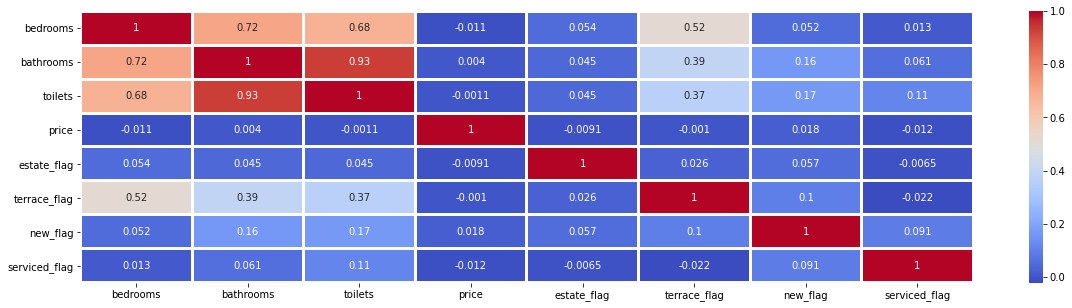

In [152]:
corr= train.corr()
#corr
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True)

In [153]:
corr

,bedrooms,bathrooms,toilets,price,estate_flag,terrace_flag,new_flag,serviced_flag
bedrooms,1.000000,0.715328,0.678101,-0.010864,0.053506,0.518781,0.052317,0.012942
bathrooms,0.715328,1.000000,0.934530,0.004021,0.045388,0.392247,0.161874,0.061394
toilets,0.678101,0.934530,1.000000,-0.001077,0.045264,0.367605,0.168036,0.114866
price,-0.010864,0.004021,-0.001077,1.000000,-0.009110,-0.001004,0.018450,-0.012345
estate_flag,0.053506,0.045388,0.045264,-0.009110,1.000000,0.025871,0.057457,-0.006546
terrace_flag,0.518781,0.392247,0.367605,-0.001004,0.025871,1.000000,0.100553,-0.022149
new_flag,0.052317,0.161874,0.168036,0.018450,0.057457,0.100553,1.000000,0.091136
serviced_flag,0.012942,0.061394,0.114866,-0.012345,-0.006546,-0.022149,0.091136,1.000000


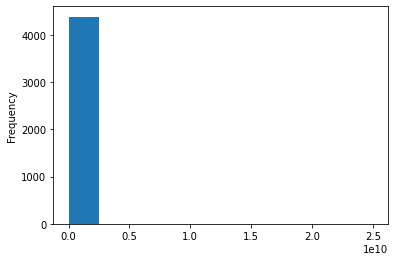

In [155]:
#Examine distribution of all houses to identify outliers
train['price'].plot(kind="hist")

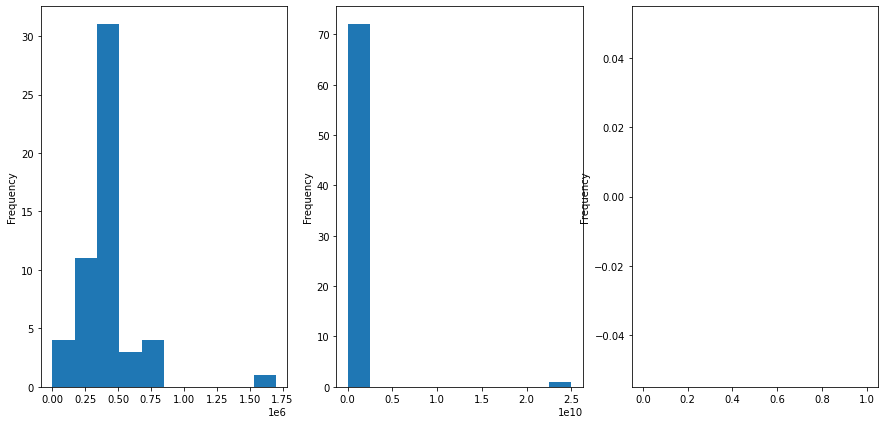

In [173]:
#Inspect the distribution of houses per location and size of house
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7))
fig.add_subplot(1, 3, 1)
train['price'][(train['location']=="gbagada")&(train['bedrooms']==1)].plot(kind="hist")
fig.add_subplot(1, 3, 2)
train['price'][(train['location']=="surulere")&(train['bedrooms']==1)].plot(kind="hist")
fig.add_subplot(1, 3, 3)
train['price'][(train['location']=="yaba")&(train['bedrooms']==1)].plot(kind="hist")




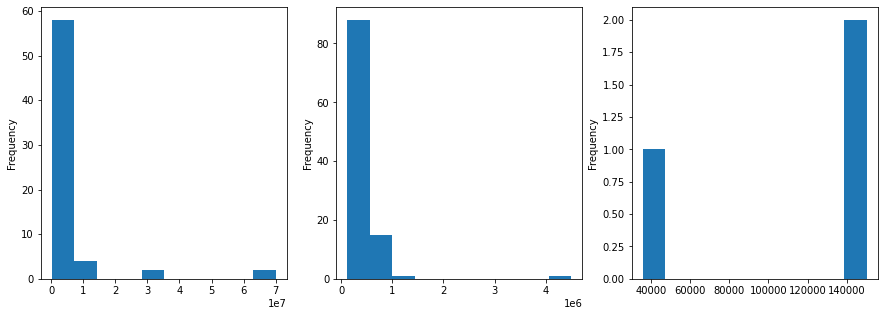

In [174]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 3, 1)
train['price'][(train['location']=="ikeja")&(train['bedrooms']==1)].plot(kind="hist")
fig.add_subplot(1, 3, 2)
train['price'][(train['location']=="ajah")&(train['bedrooms']==1)].plot(kind="hist")
fig.add_subplot(1, 3, 3)
train['price'][(train['location']=="iyana ipaja")&(train['bedrooms']==1)].plot(kind="hist")


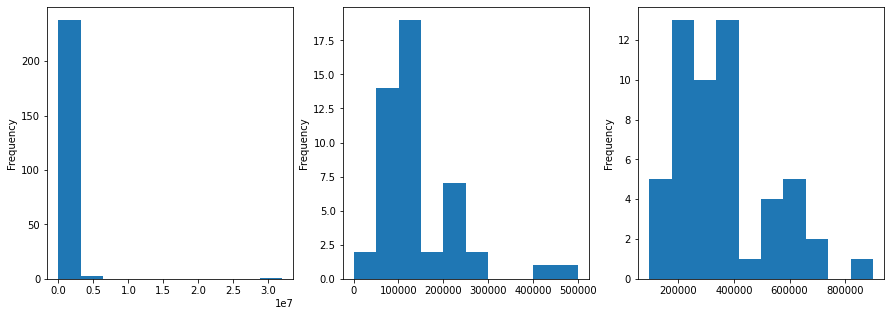

In [175]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 3, 1)
train['price'][(train['location']=="lekki")&(train['bedrooms']==1)].plot(kind="hist")
fig.add_subplot(1, 3, 2)
train['price'][(train['location']=="ikorodu")&(train['bedrooms']==1)].plot(kind="hist")
fig.add_subplot(1, 3, 3)
train['price'][(train['location']=="ogba")&(train['bedrooms']==1)].plot(kind="hist")

In [176]:
#Since some houses may have missing info it means some estate/serviced houses are not called estate/serviced houses. 
#Assumptions are made around houses which are not identified as estate/ service houses. 
#The median/50th percentile of those houses is identified and any house above the median is considered as estate.
#Houses higher than 80th percentile are classified as serviced


estate_price = []
import numpy as np
for location in ["gbagada","surulere","yaba","ogba","lekki","ikeja","iyana ipaja","ikorodu","ajah"]:
    for i in range(1,6):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train['price'][(train['location']==location)&(train['bedrooms']==i)&(train['estate_flag']==0)],50)
            d['serviced_price'] = np.percentile(train['price'][(train['location']==location)&(train['bedrooms']==i)&(train['estate_flag']==0)],80)
        except (IndexError,TypeError) as e:
            d['serviced_price'] = 0
            d['estate_price'] = 0
        estate_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train['price'][(train['location']==location)&(train['bedrooms']==i)&(train['estate_flag']==0)],50))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in gbagada :  450000.0
This is the median for 2 bedroom in gbagada :  850000.0
This is the median for 3 bedroom in gbagada :  1300000.0
This is the median for 4 bedroom in gbagada :  2750000.0
This is the median for 5 bedroom in gbagada :  2000000.0
This is the median for 1 bedroom in surulere :  450000.0
This is the median for 2 bedroom in surulere :  800000.0
This is the median for 3 bedroom in surulere :  1250000.0
This is the median for 4 bedroom in surulere :  2500000.0
This is the median for 5 bedroom in surulere :  0
This is the median for 1 bedroom in yaba :  0
This is the median for 2 bedroom in yaba :  0
This is the median for 3 bedroom in yaba :  0
This is the median for 4 bedroom in yaba :  0
This is the median for 5 bedroom in yaba :  0
This is the median for 1 bedroom in ogba :  350000.0
This is the median for 2 bedroom in ogba :  625000.0
This is the median for 3 bedroom in ogba :  750000.0
This is the median for 4 bedroom in ogba :  1500